In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
corpus=[
    "AI is the latest trending field in current word",
    "India is the contry with latented and valuable workfoce",
    "Data can be said to be oil of current century"
]

In [3]:
clean_text=[sen.lower() for sen in corpus]
print(clean_text)

['ai is the latest trending field in current word', 'india is the contry with latented and valuable workfoce', 'data can be said to be oil of current century']


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk=Tokenizer()

In [5]:
tk.fit_on_texts(clean_text)
w2idx=tk.word_index
idx2w={v:k for k,v in w2idx.items()}
print(w2idx)
print(idx2w)

{'is': 1, 'the': 2, 'current': 3, 'be': 4, 'ai': 5, 'latest': 6, 'trending': 7, 'field': 8, 'in': 9, 'word': 10, 'india': 11, 'contry': 12, 'with': 13, 'latented': 14, 'and': 15, 'valuable': 16, 'workfoce': 17, 'data': 18, 'can': 19, 'said': 20, 'to': 21, 'oil': 22, 'of': 23, 'century': 24}
{1: 'is', 2: 'the', 3: 'current', 4: 'be', 5: 'ai', 6: 'latest', 7: 'trending', 8: 'field', 9: 'in', 10: 'word', 11: 'india', 12: 'contry', 13: 'with', 14: 'latented', 15: 'and', 16: 'valuable', 17: 'workfoce', 18: 'data', 19: 'can', 20: 'said', 21: 'to', 22: 'oil', 23: 'of', 24: 'century'}


In [6]:
sequence=tk.texts_to_sequences(clean_text)
print(sequence)

[[5, 1, 2, 6, 7, 8, 9, 3, 10], [11, 1, 2, 12, 13, 14, 15, 16, 17], [18, 19, 4, 20, 21, 4, 22, 23, 3, 24]]


In [7]:
context_size=2
emb_size=10
vocab_size=len(w2idx)+1
target=[]
context=[]

for seq in sequence:
    for i in range(context_size,len(seq)-context_size):
        target.append(seq[i])
        temp=seq[i-context_size:i]+seq[i+1:i+context_size+1]
        context.append(temp)
        
print(target)
print(context)

[2, 6, 7, 8, 9, 2, 12, 13, 14, 15, 4, 20, 21, 4, 22, 23]
[[5, 1, 6, 7], [1, 2, 7, 8], [2, 6, 8, 9], [6, 7, 9, 3], [7, 8, 3, 10], [11, 1, 12, 13], [1, 2, 13, 14], [2, 12, 14, 15], [12, 13, 15, 16], [13, 14, 16, 17], [18, 19, 20, 21], [19, 4, 21, 4], [4, 20, 4, 22], [20, 21, 22, 23], [21, 4, 23, 3], [4, 22, 3, 24]]


In [8]:
x=np.array(context)
y=np.array(target)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Lambda,Dense,Dropout

In [11]:
import tensorflow as tf

In [12]:
model=Sequential([
  Embedding(input_dim=vocab_size,output_dim=emb_size,input_length=2*context_size),
  Lambda(lambda x:tf.reduce_mean(x,axis=1)),
  Dense(256,activation='relu'),
  Dense(512,activation='relu'),
  Dense(vocab_size,activation='softmax')
])

C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy,metrics=['accuracy'])

In [17]:
model.fit(x,y,epochs=300,batch_size=10,shuffle=True)

Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0281
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0253
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0224
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 1.0000 - loss: 0.01908
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0169
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 1.0000 - loss: 0.0173
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0145
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0133
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0126
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0112
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0099
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0

<Axes: >

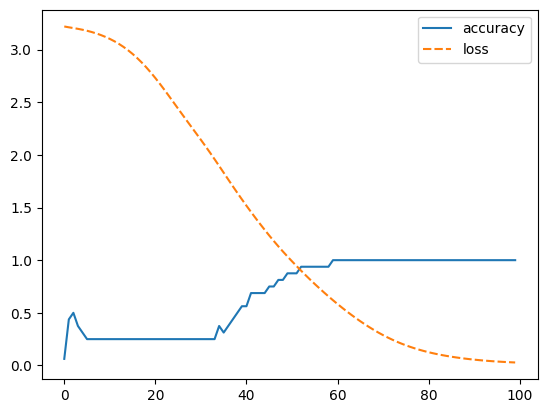

In [15]:
sns.lineplot(model.history.history)

In [18]:
x_inp=["the latest trending field in","to be oil of current"]
for sen in x_inp:
    low=sen.lower()
    words=low.split(" ")
    ind=[]
    for w in words:
        i=w2idx.get(w)
        if i is not None:
            ind.append(i)
    while len(ind) < 2 * context_size:
      ind.append(0)  # Assuming padding index is 0   
    x_inp_test=np.array([ind])
    pred=model.predict(x_inp_test)
    ac_ind=pred.argmax()
    print(idx2w.get(ac_ind))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
trending
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
oil
